# Описание данных


**Данные для первой части**


Файл /datasets/hypothesis.csv. 
  - Hypothesis — краткое описание гипотезы;
  - Reach — охват пользователей по 10-балльной шкале;
  - Impact — влияние на пользователей по 10-балльной шкале;
  - Confidence — уверенность в гипотезе по 10-балльной шкале;
  - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
  
**Данные для второй части**

Файл /datasets/orders.csv.

  - transactionId — идентификатор заказа;
  - visitorId — идентификатор пользователя, совершившего заказ;
  - date — дата, когда был совершён заказ;
  - revenue — выручка заказа;
  - group — группа A/B-теста, в которую попал заказ.
  
  
Файл /datasets/visitors.csv.

  - date — дата;
  - group — группа A/B-теста;
  - visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Описание проекта**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
import scipy.stats as stats

##  Изучение данных

In [2]:
hyp = pd.read_csv('/datasets/hypothesis.csv')
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
ors = pd.read_csv('/datasets/orders.csv')
ors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [4]:
vts = pd.read_csv('/datasets/visitors.csv')
vts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


✔️ **Пропусков в отчетах нет, даты нужно привести к соответсвующему формату.**

## Предобработка данных

In [5]:
#приведем даты к нужному формату
ors['date'] = pd.to_datetime(ors['date'],format='%Y-%m-%d')
vts['date'] = pd.to_datetime(vts['date'],format='%Y-%m-%d')

# Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
**Задача**
  - Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
  - Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
  - Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

## Приоритизация гипотез

### Применение фреймворка ICE для приоритизации гипотез. Сортировка по убыванию приоритета.

In [6]:
 #посмотрим на данные
hyp

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [7]:
hyp['ICE'] = (hyp['Impact'] * hyp['Confidence']) / hyp['Efforts']
hyp[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


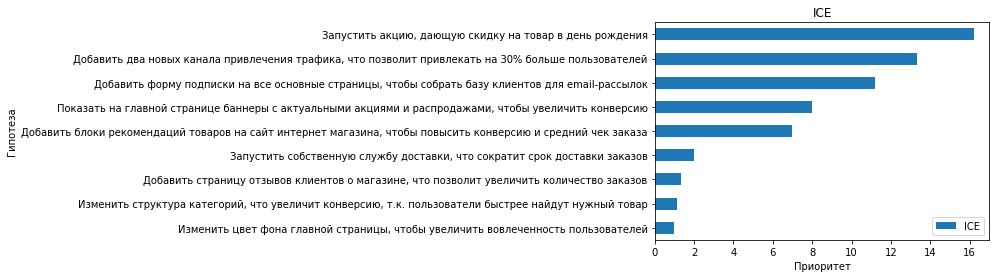

In [8]:
ax = hyp[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

### Применение фреймворка RICE для приоритизации гипотез. Сортировка по убыванию приоритета.

In [9]:
hyp['RICE'] = (hyp['Reach'] * hyp['Impact'] * hyp['Confidence']) / hyp['Efforts']
hyp[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).round(2)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


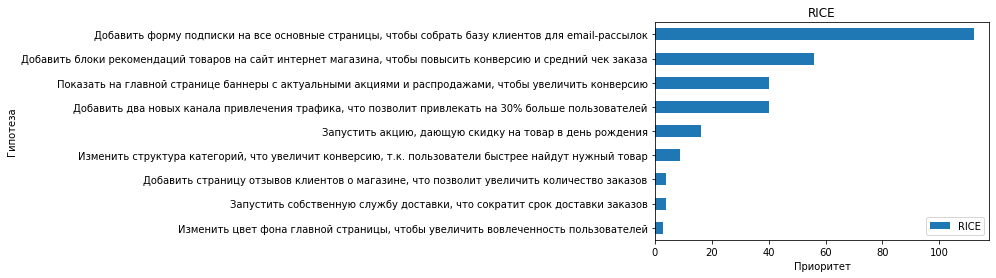

In [10]:
ax = hyp[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

✔️ **Вывод**

  - По значениям Ice самые приоритетные гипотезы - 8, 0, 7, 6.
  - По значениям Rice самые приоритетные гипотезы - 7, 2, 0, 6.
  - Данные по Rice более предпочтительны, так как учитывают важный показатель - охват аудитории.
  - Разница результатов как раз основана на этом дополнительном показателе.
  - По результатам приоритизации можно сказать, что несмотря на разницу в оценках, оба расчета показали, что 3, 1, 5, 4 - не самые приоритетные гипотезы.

# Часть 2. Анализ A/B-теста



## Анализ A/B-теста:


### График кумулятивной выручки по группам

In [11]:
#посмотрим на данные
ors.sample(7)

,transactionId,visitorId,date,revenue,group
78,773663763,3288820196,2019-08-16,40740,B
664,2280802660,2412366830,2019-08-29,4877,B
162,2634363174,2892265953,2019-08-17,1990,A
1156,1254962016,2654030115,2019-08-14,1980,A
1007,3901196331,3077470899,2019-08-10,3550,B
644,3664867609,1476256851,2019-08-26,1530,A
1106,626262509,3791892006,2019-08-12,3320,B


In [12]:
vts.sample(7)

,date,group,visitors
30,2019-08-31,A,699
12,2019-08-13,A,748
0,2019-08-01,A,719
27,2019-08-28,A,594
24,2019-08-25,A,621
49,2019-08-19,B,487
41,2019-08-11,B,721


In [13]:
#соберем таблицу с уникальными сочетаниями дат и групп.
unq_dt_gr = ors.copy()
unq_dt_gr_tbl = unq_dt_gr[['date', 'group']].drop_duplicates()
unq_dt_gr_tbl.sample(7)

,date,group
493,2019-08-26,A
0,2019-08-15,B
835,2019-08-08,A
567,2019-08-09,B
86,2019-08-22,A
305,2019-08-28,B
730,2019-08-30,A


In [14]:
#cоберем кумулятивные данные по выделенным дням.
ors_agg = unq_dt_gr_tbl.apply(lambda x:
                                 unq_dt_gr[np.logical_and(
                                 unq_dt_gr['date'] <= x['date'], 
                                 unq_dt_gr['group'] == x['group'])]
                                 .agg({'date' : 'max', 
                                       'group' : 'max',
                                       'visitorId' : 'nunique', 
                                       'transactionId' : 'nunique',
                                       'revenue' : 'sum'
                                      }), axis=1)\
                            .sort_values(by=['date', 'group'])
ors_agg.sample(7)

,date,group,visitorId,transactionId,revenue
569,2019-08-09,A,159,177,1025603
1149,2019-08-14,B,287,308,2025446
125,2019-08-17,B,349,373,2620790
540,2019-08-20,A,330,362,2469529
181,2019-08-23,B,440,477,4703216
835,2019-08-08,A,146,161,837097
362,2019-08-06,A,114,127,598401


In [15]:
vts_agg = unq_dt_gr.apply(lambda x:
                                 vts[np.logical_and(
                                 vts['date'] <= x['date'], 
                                 vts['group'] == x['group'])]
                                 .agg({'date' : 'max', 
                                       'group' : 'max',
                                       'visitors' : 'sum'
                                      }), axis=1)\
                            .sort_values(by=['date', 'group'])
vts_agg.sample(7)

,date,group,visitors
20,2019-08-15,B,9600
235,2019-08-23,B,14070
1052,2019-08-11,B,6998
727,2019-08-07,A,4629
1115,2019-08-13,B,8310
180,2019-08-23,A,13927
229,2019-08-18,A,11127


In [16]:
#объединим таблицы
vts_ors = ors_agg.merge(vts_agg, on=['date', 'group'])
vts_ors.columns = ['date', 'group', 'buyers', 'orders', 'revenue', 'visitors']
vts_ors.sample(7)

,date,group,buyers,orders,revenue,visitors
899,2019-08-23,B,440,477,4703216,14070
412,2019-08-10,B,215,228,1539203,6277
167,2019-08-05,A,100,109,549917,3318
350,2019-08-09,A,159,177,1025603,5856
922,2019-08-24,B,454,493,4798722,14448
716,2019-08-19,A,320,350,2391910,11629
1182,2019-08-31,B,586,640,5907760,18916


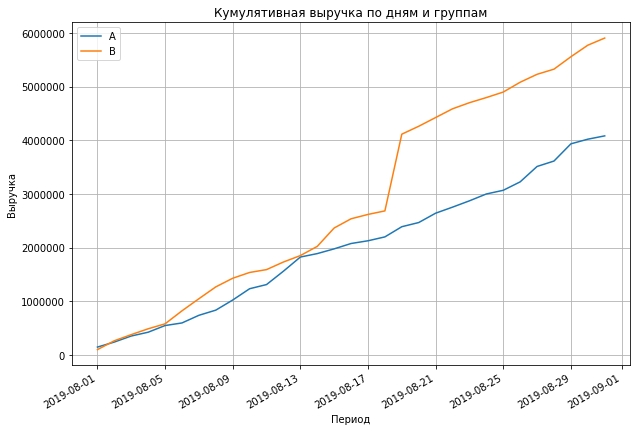

In [17]:
#график кумулятивной выручки
cum_A = vts_ors[vts_ors['group'] == 'A'][['date', 'revenue', 'orders']]
cum_B = vts_ors[vts_ors['group'] == 'B'][['date', 'revenue', 'orders']]

fig = plt.figure(figsize=[10,7])
plt.plot(cum_A['date'], cum_A['revenue'], label='A')
plt.plot(cum_B['date'], cum_B['revenue'], label='B')
fig.autofmt_xdate()
plt.legend()
plt.title('Кумулятивная выручка по дням и группам')
plt.xlabel("Период")
plt.ylabel("Выручка")
plt.grid(True)
plt.show()

✔️ **Вывод** 

Выручка увеличивается в течение всего теста, но график выручки группы B в моменте резко растет. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.

### График кумулятивного среднего чека

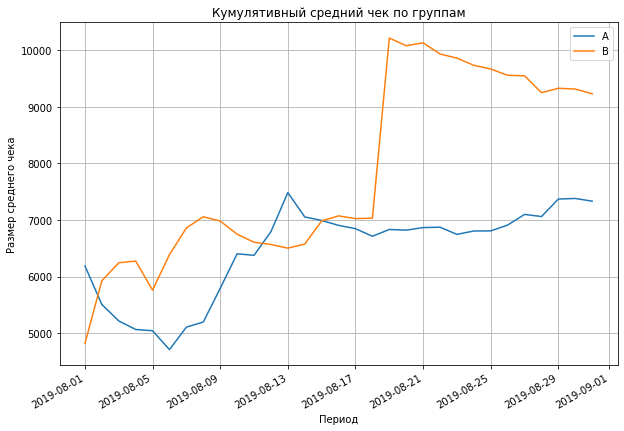

In [18]:
fig = plt.figure(figsize=[10,7])
plt.plot(cum_A['date'], cum_A['revenue'] / cum_A['orders'], label='A')
plt.plot(cum_B['date'], cum_B['revenue'] / cum_B['orders'], label='B')
fig.autofmt_xdate()
plt.legend()
plt.title('Кумулятивный средний чек по группам')
plt.xlabel("Период")
plt.ylabel("Размер среднего чека")
plt.grid(True)
plt.show()

✔️ **Вывод** 

Средний чек становится более равномерным к концу теста: немного растет для группы A и и продолжает падать для группы B. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике).

### График относительного изменения кумулятивного среднего чека группы B к группе A.

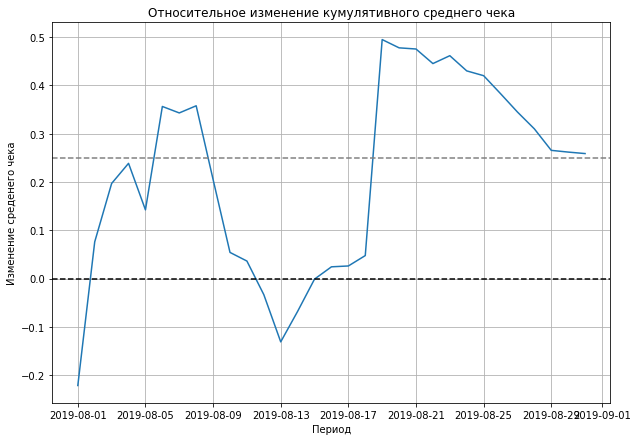

In [19]:
#объеденим данные, рассчитаем относительное изменение кумулятивного среднего чека и построим график.

mrg_cum = cum_A.merge(cum_B, on='date', suffixes=['A','B'])
plt.figure(figsize=(10,7))
plt.plot(mrg_cum['date'] ,(
        (mrg_cum['revenueB'] / mrg_cum['ordersB']
         ) / (mrg_cum['revenueA'] / mrg_cum['ordersA']) - 1))
fig.autofmt_xdate()
plt.title('Относительное изменение кумулятивного среднего чека')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.25, color='gray', linestyle='--')
plt.xlabel("Период")
plt.ylabel("Изменение среденего чека")
plt.grid(True)
plt.show()

✔️ **Вывод** 

График различия между сегментами резко «скачет». Сначала средний чек группы B стабильно растет, потом резко падает и резко взлетает. Возможно это влияние крупных заказов и выбросов. Все три графика демонстрируют одинаковую картину.

### График кумулятивной конверсии

In [20]:
#считаем кумулятивную конверсию
vts_ors['conversion'] = vts_ors['orders']/vts_ors['visitors']
print(vts_ors['conversion'].min())
print(vts_ors['conversion'].max())

0.029217427214536445
0.03685636856368564


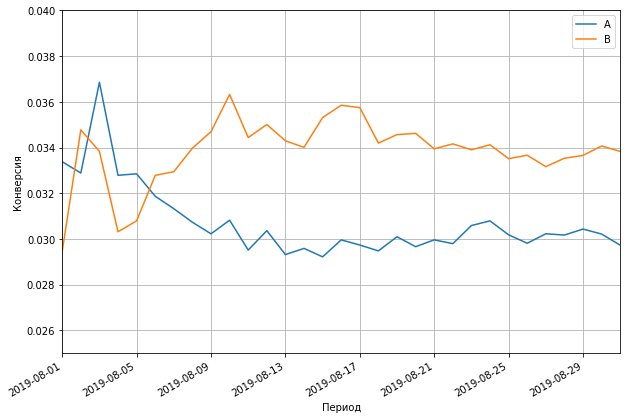

In [21]:
# отделяем данные по группе A и B
vts_ors_A = vts_ors[vts_ors['group']=='A']
vts_ors_B = vts_ors[vts_ors['group']=='B']


# строим графики
fig = plt.figure(figsize=[10,7])
plt.plot(vts_ors_A['date'], vts_ors_A['conversion'], label='A')
plt.plot(vts_ors_B['date'], vts_ors_B['conversion'], label='B')
fig.autofmt_xdate()
plt.legend()
plt.xlabel("Период")
plt.ylabel("Конверсия")
plt.grid(True)

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.025, 0.040])
plt.show()

✔️ **Вывод** 

Группы колебались около одного значения, но затем конверсия группы B вырвалась вперёд и зафиксировалась, а конверсия группы A просела и также зафиксировалась.

### График относительного изменения кумулятивной конверсии группы B к группе A

In [22]:
mrg_conv = vts_ors_A.merge(vts_ors_B, on='date', suffixes=['A','B'])
mrg_conv.head()

,date,groupA,buyersA,ordersA,revenueA,visitorsA,conversionA,groupB,buyersB,ordersB,revenueB,visitorsB,conversionB
0,2019-08-01,A,20,24,148579,719,0.03338,B,20,21,101217,713,0.029453
1,2019-08-01,A,20,24,148579,719,0.03338,B,20,21,101217,713,0.029453
2,2019-08-01,A,20,24,148579,719,0.03338,B,20,21,101217,713,0.029453
3,2019-08-01,A,20,24,148579,719,0.03338,B,20,21,101217,713,0.029453
4,2019-08-01,A,20,24,148579,719,0.03338,B,20,21,101217,713,0.029453


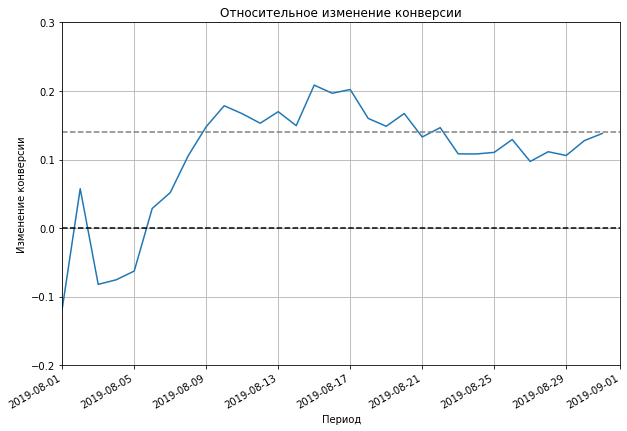

In [23]:
#построим график
fig = plt.figure(figsize=[10,7])
plt.plot(mrg_conv['date'],
        mrg_conv['conversionB'] / mrg_conv['conversionA'] - 1)
fig.autofmt_xdate()
plt.title('Относительное изменение конверсии')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='gray', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), -0.2, 0.3])
plt.xlabel("Период")
plt.ylabel("Изменение конверсии")
plt.grid(True)
plt.show()

✔️ **Вывод** 

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Конверсия группы B стабильно выше. Стоит проанализировать аномалии, возможно результаты изменятся.

### Точечный график количества заказов по пользователям

In [24]:
#подсчитаем количество заказов по пользователям
ors_us = ors.copy()
ors_us = ors_us.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ors_us.columns = ['visitorId','orders']
ors_us.sort_values(by='orders',ascending=False).head(7)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5


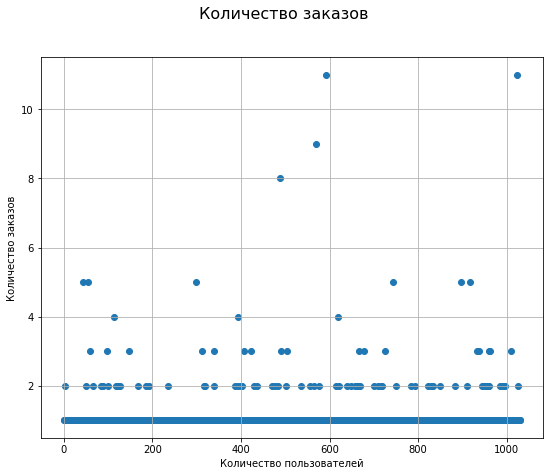

In [25]:
#построим график

fig = plt.figure(figsize=(9,7))
fig.suptitle('Количество заказов', fontsize=16)

x_values = pd.Series(range(0, len(ors_us['orders'])))
plt.scatter(x_values, ors_us['orders'])
plt.ylabel('orders_count')
plt.xlabel("Количество пользователей")
plt.ylabel("Количество заказов")
plt.grid(True)
plt.show()

✔️ **Вывод** 


Ну в основном покупают 1 раз, но есть и покупатели, которые сидят на интернет-магазинной игле.

### 95-й и 99-й перцентили количества заказов на пользователя

In [26]:
print(np.percentile(ors_us['orders'], [95, 99]))

[2. 4.]


✔️ **Вывод** 


Будем считать аномальными пользователями всех, кто оформил более 2 заказов, то есть отсечем 5% пользователей.

### Точечный график стоимостей заказов

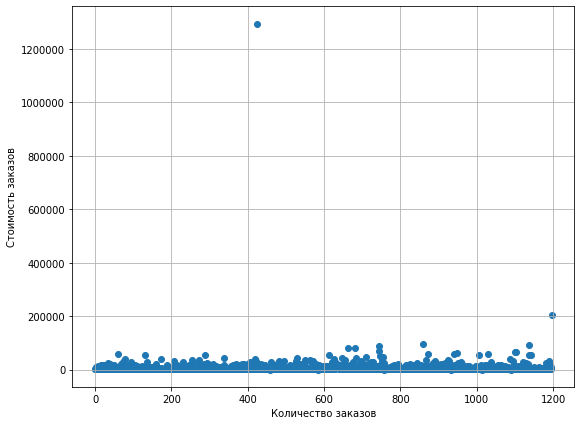

In [27]:
x_values = pd.Series(range(0,len(ors['revenue'])))
fig = plt.figure(figsize=(9,7))
plt.scatter(x_values, ors['revenue'])
plt.xlabel("Количество заказов")
plt.ylabel("Стоимость заказов")
plt.grid(True)
plt.show()

✔️ **Вывод** 

Практически все стоимости заказов находятся в пределах 100000, но есть выбросы со стоимостями более миллиона. Именно этот заказ отразился на всех графиках.

### 95-й и 99-й перцентили стоимости заказов

In [28]:
print(np.percentile(ors['revenue'], [95, 99]))

[28000.  58233.2]


✔️ **Вывод** 

Менее 5% заказов стоят дороже 28000, можно взять эту цифру за границу для определения аномальных заказов

### Cтатистическая значимость различий в конверсии между группами по «сырым» данным

In [29]:
#рассчитаем общее количество пользователей по группам
vts_dl = vts.copy()
vts_A = vts_dl[vts_dl['group'] == 'A'][['date', 'visitors']]
vts_A.columns = ['date', 'vtsPerDateA']

vts_B = vts_dl[vts_dl['group'] == 'B'][['date', 'visitors']]
vts_B.columns = ['date', 'vtsPerDateB']

In [30]:
#сохраним таблицу с покупателями и количеством покупок по группам
ors_dl= ors.copy()
ors_A = ors_dl[ors_dl['group'] == 'A'].groupby('visitorId').agg({'transactionId' : 'nunique'})['transactionId'].reset_index()
ors_A.columns = ['userId', 'orders']

ors_B = ors_dl[ors_dl['group'] == 'B'].groupby('visitorId').agg({'transactionId' : 'nunique'})['transactionId'].reset_index()
ors_B.columns = ['userId', 'orders']

In [31]:
#создадим выборки, в которых будет количество заказов всех пользователей
sampleA = pd.concat([ors_A['orders'],
                     pd.Series(0,
                               index = np.arange(vts_A['vtsPerDateA'].sum() - len(ors_A)),
                               name='all_orders')
                    ], axis=0)


sampleB = pd.concat([ors_B['orders'],
                     pd.Series(0, 
                               index = np.arange(vts_B['vtsPerDateB'].sum() - len(ors_B)),
                               name='all_orders')
                    ], axis=0)

#посчитаем статистическую значимость различий в конверсии.
#нулевая гипотеза - различий в конверсии между группами нет. Альтернативная гипотеза - различия в конверсии между группами есть.
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


✔️ **Вывод** 

P-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - отвергаем.

По «сырым» данным есть различия в конверсии групп A и B. Относительная развница в конверсиях около 14% (прирост группы B)

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

In [32]:
print("{0:.3f}".format(stats.mannwhitneyu(ors[ors['group']=='A']['revenue'], ors[ors['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(ors[ors['group']=='B']['revenue'].mean()/ors[ors['group']=='A']['revenue'].mean()-1))

0.365
0.259


✔️ **Вывод** 

P-value значительно больше 0.05. Значит, нельзя отвегнуть нулевую гипотезу. В среднем чеке заказа между группами различий нет.

Впрочем, средний чек группы B почти на 26% выше среднего чека группы A.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Выделим аномальный срез данных по пользователям, которые оформили более 2х заказов и тех кто потратил более 58233. Так мы уберём 5% пользователей с наибольшим числом заказов и с дорогими заказами.

In [33]:
usr_ors = pd.concat(
    [ors_A[ors_A['orders'] > 2]['userId'], ors_B[ors_B['orders'] > 2]['userId']])

usr_ors_2 = ors[ors['revenue'] > 58233]['visitorId']
usr_ors_2.name = 'userId'

In [34]:
#общая таблица аномальных пользователей
anl_urs = pd.concat([
    usr_ors, usr_ors_2
], axis=0).drop_duplicates().sort_values()
print(anl_urs.head())
len(anl_urs)

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: userId, dtype: int64


31

In [35]:
#таблица без аномальных пользователей
good_usr_A = pd.concat([ors_A[~ors_A['userId'].isin(anl_urs)]['orders'],
                     pd.Series(0,
                               index = np.arange(vts_A['vtsPerDateA'].sum() - len(ors_A)),
                               name='all_orders')
                    ], axis=0)

good_usr_B = pd.concat([ors_B[~ors_B['userId'].isin(anl_urs)]['orders'],
                     pd.Series(0,
                               index = np.arange(vts_B['vtsPerDateB'].sum() - len(ors_B)),
                               name='all_orders')
                    ], axis=0)

In [36]:
print("{0:.3f}".format(stats.mannwhitneyu(good_usr_A, good_usr_B)[1]))
print("{0:.3f}".format(good_usr_B.mean()/good_usr_A.mean()-1))

0.005
0.174


✔️ **Вывод** 

Результаты по конверсии практически не изменились. p-value остался значительно меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - отвергаем.

По очищенным данным есть статистически значимые различия в конверсии групп A и B. Относительный прирост конверсии группы B около 17%

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [37]:
#статистическая значимость различий в конверсии между группами.
print("{0:.3f}".format(stats.mannwhitneyu(
    ors[np.logical_and(
        ors['group']=='A',
        np.logical_not(ors['visitorId'].isin(anl_urs)))]['revenue'],
    ors[np.logical_and(
        ors['group']=='B',
        np.logical_not(ors['visitorId'].isin(anl_urs)))]['revenue'])[1]))

print("{0:.3f}".format(
    ors[np.logical_and(ors['group']=='B',np.logical_not(ors['visitorId'].isin(anl_urs)))]['revenue'].mean()/
    ors[np.logical_and(
        ors['group']=='A',
        np.logical_not(ors['visitorId'].isin(anl_urs)))]['revenue'].mean() - 1))

0.399
-0.020


✔️ **Вывод** 

P-value практически не изменился, а разница между сегментами сильно изменилась. Очищенные данные показывают, что средний чек группы B немного уступает группе A, в то время как на сырых данных чек группы B был на 26% больше.

По очищенным данным статистически значимых различий среднего чека между группами нет.

### Результаты A/B теста

**-по конверсии между группами A и B (как по сырым данным, так и по очищенным) есть статистически значимые различия;**

**-по среднему чеку между группами A и B (как по сырым данным, так и по очищенным) нет статистически значимых различий.**

**-график различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту и практически зафиксировались.**


Данный тест можно остановить и считать успешно проведенным. Конверсия из пользователя в покупателя у группы B статистически значимо выше, чем у группы A. При этом средний чек между группами не отличается.
